In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

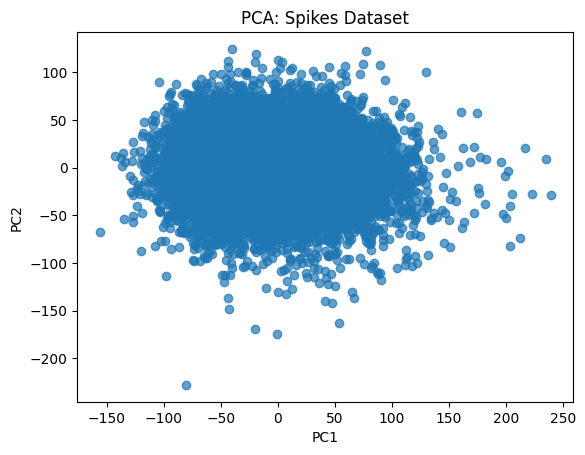

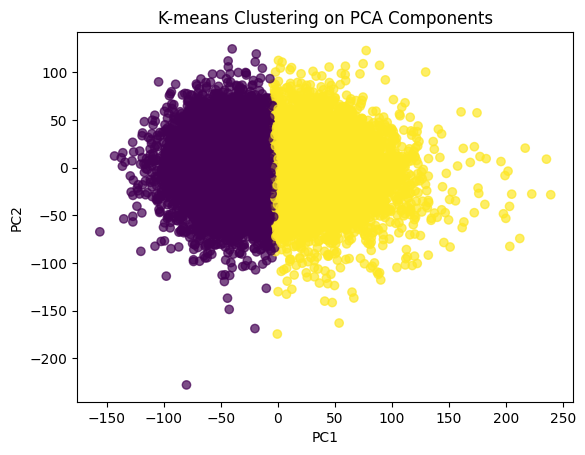

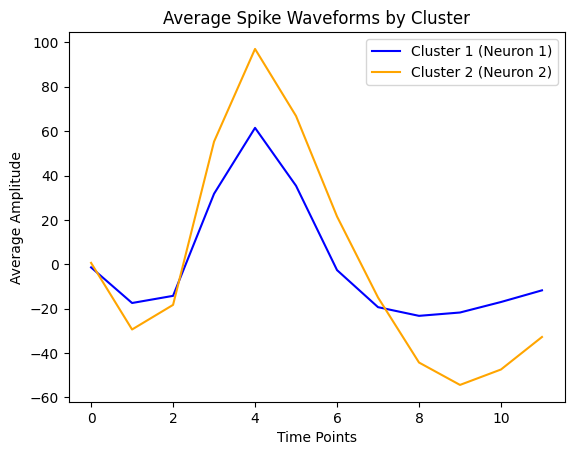

In [2]:
# Load the spikes dataset (replace 'spikes.csv' with your actual file path)
# For this code to work, make sure the spikes.csv file is present in your working directory.
spikes = np.loadtxt('spikes.csv', delimiter=',')

# Step 1: Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
spikes_2d = pca.fit_transform(spikes)

# Visualize PCA-reduced data
plt.scatter(spikes_2d[:, 0], spikes_2d[:, 1], alpha=0.7)
plt.title('PCA: Spikes Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Step 2: Apply K-means clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(spikes_2d)

# Visualize clusters
plt.scatter(spikes_2d[:, 0], spikes_2d[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.title('K-means Clustering on PCA Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Step 3: Separate original data into clusters based on labels
cluster1_spikes = spikes[cluster_labels == 0]
cluster2_spikes = spikes[cluster_labels == 1]

# Compute average time courses for each cluster
cluster1_avg = np.mean(cluster1_spikes, axis=0)
cluster2_avg = np.mean(cluster2_spikes, axis=0)

# Step 4: Plot the average spike waveforms for each cluster
plt.plot(cluster1_avg, label='Cluster 1 (Neuron 1)', color='blue')
plt.plot(cluster2_avg, label='Cluster 2 (Neuron 2)', color='orange')
plt.title('Average Spike Waveforms by Cluster')
plt.xlabel('Time Points')
plt.ylabel('Average Amplitude')
plt.legend()
plt.show()

var 2

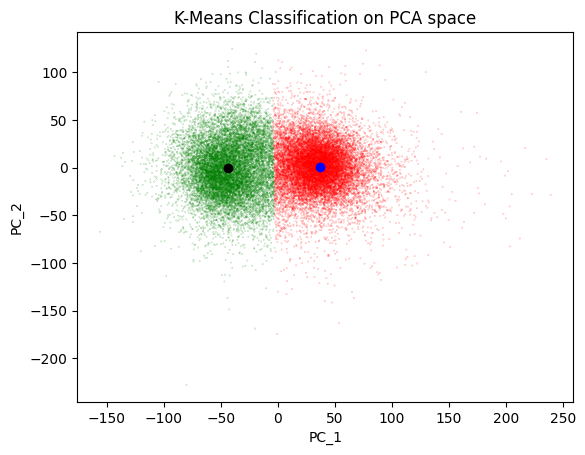

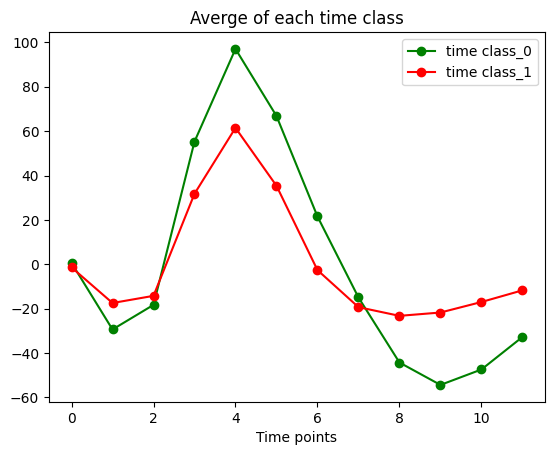

In [5]:
# Load the spikes dataset (ensure 'spikes.csv' is available in your working directory)
spikes = np.loadtxt('spikes.csv', delimiter=',')

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
pcscores = pca.fit_transform(spikes)  # Calculate PCA scores

# data from PCA
data = np.vstack((pcscores[:,0], pcscores[:,1])).T
 
# KMeans classification
k = 2 # how many clusters?
km = KMeans(n_clusters=k).fit(data)
# group labels
groupidx = km.predict(data)
# centroids
cents = km.cluster_centers_
 
# generate color_map, and averges of each class based on KMeans classification
groupidx_color=[]
counter = 0
class_0 = 0
class_1 = 0
for i in range(len(groupidx)):
    if groupidx[i] == 0:
        groupidx_color.append('r')
        class_0 += spikes[i]
        counter+=1
    else:
        groupidx_color.append('g')
        class_1 += spikes[i]
 
#Normalize classes
class_0 = class_0 / counter
class_1 = class_1 / (len(groupidx) - counter)
 
 
#ploting
plt.scatter(pcscores[:,0],pcscores[:,1],c=groupidx_color, s=0.01)
plt.plot(cents[:1,0],cents[:1,1],'bo')
plt.plot(cents[1:,0],cents[1:,1],'ko')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.title('K-Means Classification on PCA space')
plt.show()
 
plt.plot(class_0,'go-', label = 'time class_0')
plt.plot(class_1,'ro-', label = 'time class_1')
plt.xlabel('Time points')
plt.title('Averge of each time class')
plt.legend()
plt.show()



var 3

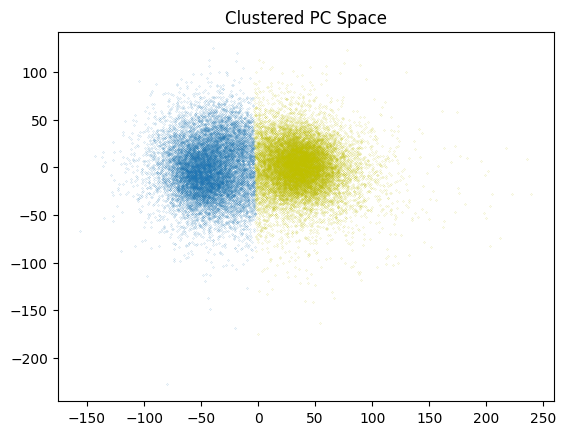

In [6]:
k = 2
kmeans = KMeans(n_clusters=k, n_init='auto')
groupidx = kmeans.fit_predict(pcscores)
 
plt.title('Clustered PC Space')
plt.plot(pcscores[groupidx==0,0], pcscores[groupidx==0,1], 'y.', ms=.2)
plt.plot(pcscores[groupidx==1,0], pcscores[groupidx==1,1], '.', ms=.2);

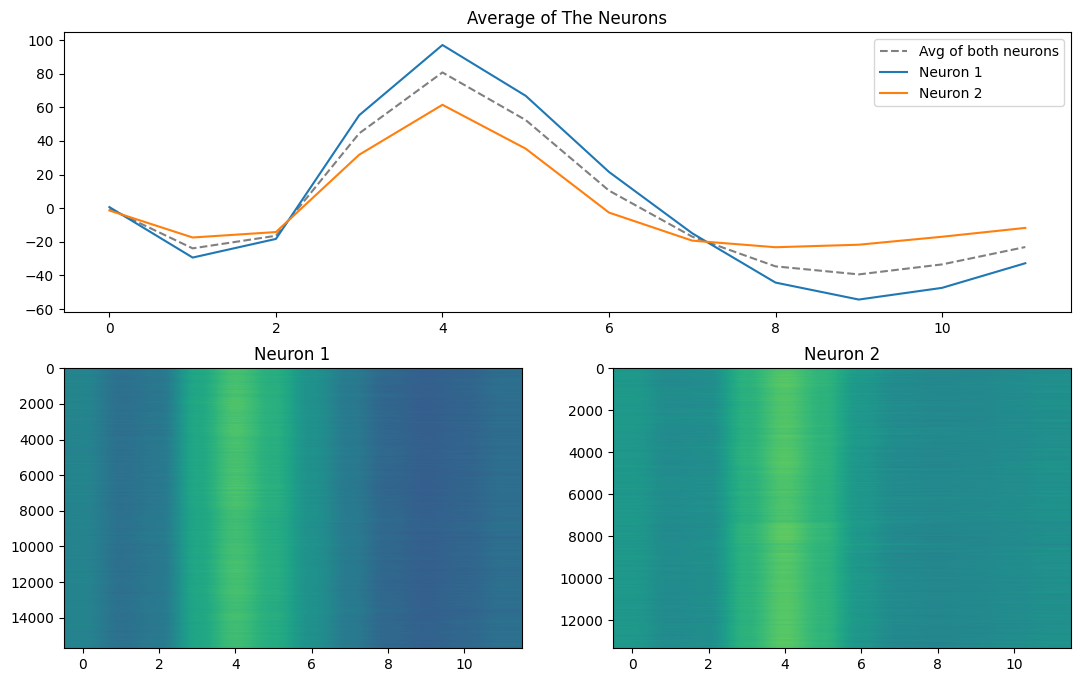

In [7]:

# Comparing the waveforms of the two neurons:

wv1 = np.mean(spikes[groupidx==0], axis=0)
wv2 = np.mean(spikes[groupidx==1], axis=0)
 
plt.figure(figsize=(13, 8))
 
plt.subplot(2, 2, (1,2))
plt.title('Average of The Neurons')
plt.plot(np.mean(spikes,axis=0), '--', color='gray', label='Avg of both neurons')
plt.plot(wv1, label='Neuron 1')
plt.plot(wv2, label='Neuron 2')
plt.legend()
 
plt.subplot(2, 2, 3)
plt.title('Neuron 1')
plt.imshow(spikes[groupidx==0], aspect='auto')
 
plt.subplot(2, 2, 4)
plt.title('Neuron 2')
plt.imshow(spikes[groupidx==1], aspect='auto');